# Polynomial regression

This approach is a generalization of the linear regression approach hence the theoretical aspect is the same as explained in the [linear regression notebook](https://github.com/imAlessas/neural-networks/blob/main/algorithms/regression/linear-regression.ipynb).

## Initial setup

The initial setup is the same as the previous one. After importing the needed libraries the samples are generated with a random exponential function. This is needed to make the sample being concentrated at the beginning as we will see in the plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(101)
# x[:, None]               # shape: (3, 1) <- 2d (single column matrix)
# x[:, np.newaxis]         # shape: (3, 1) <- a meaningful alias to None
# x.reshape(-1, 1)         # shape: (3, 1)

# number of samples
N = 250

# generate sample data (exponential)
X = np.random.exponential(scale = 1, size = N)

The quadratic target function is generated by defining the power of the noise and the noise itself. Then the three coefficients $a$, $b$ and $c$ are defined to define the function: $y = ax^2 + bx + c$.

In [2]:
# noise power
power = 2.5

# additive noise
noise = power * np.random.randn(N)


# X^2 coefficient
a = 4

# X^1 coefficient
b = -15

# X^0 coefficient
c = 1

# generate (oracle) quadratic target function
y = (a * X**2) + (b * X) + c + noise

Eventually, we stack up the _bias vector_ and create a third feature that represents the $x^2$ coefficients.

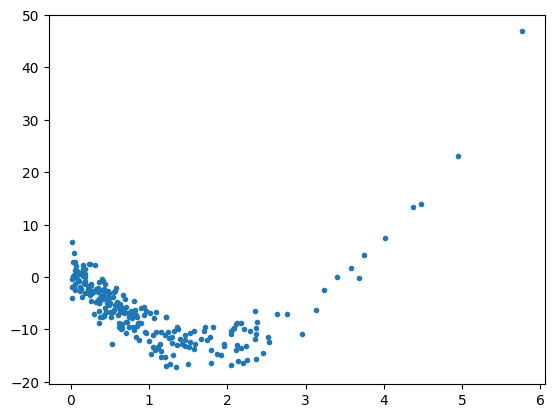

In [3]:
# bias vector
X0 = np.ones(N)

# create (quadratic) data matrix
Xnew = np.stack((X0, X, X**2), axis = 1)
# Xnew = np.stack((X0, X, X**2, X**3), axis=1)

# plot points
plt.plot(X, y, '.')

## Fitting

The weight vector $w$ is computed with the same formula we saw all compacted in one line. Afterward the function is plotted.

[  1.17487261 -14.9708039    4.02415596]
    c: 1         b: -15         a: 4


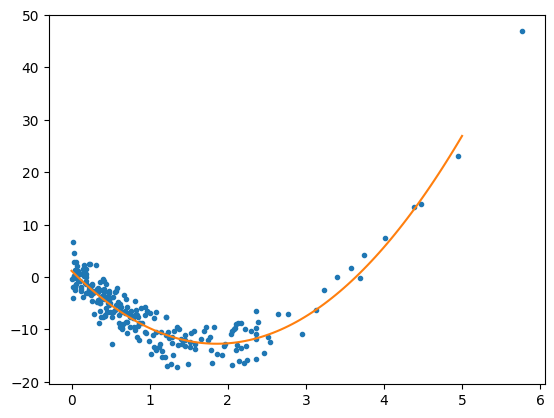

In [4]:
# find closed form solution

# w = np.dot(np.linalg.inv(np.dot(np.transpose(Xnew), Xnew)), np.dot(np.transpose(Xnew), y))
w = np.dot(
            np.linalg.inv(
                        np.dot(
                                np.transpose(Xnew),
                                Xnew
                              )
                        ),
            np.dot(
                    np.transpose(Xnew),
                    y
                  )
            )

# prints for comparison
print(w)
print("    c: " + str(c) + "         b: " + str(b) + "         a: " + str(a))

# generate grid of points
x_grid = np.linspace(0, 5, 100)

# plot line
plt.plot(X, y, '.')
plt.plot(x_grid, w[0] + x_grid * w[1] + x_grid**2 * w[2])
# plt.plot(x_grid, w[0] + x_grid * w[1] + x_grid**2 * w[2] + x_grid**3 * w[3])

## Observation

One important thing to notice is that when we try to fit the 2nd-grade function with a 3rd-grade function we will see that the coefficient of $x^3$, which is the fourth value in the $w$ vector will be extremely near zero.